In [1]:
##web scraping project - EDA

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('~/desktop/finalformat.csv')

In [44]:
df.columns

Index(['spoiler', 'title', 'year', 'primary_genre', 'url', 'searchstr',
       'apistr', 'genre'],
      dtype='object')

In [52]:
barplot = df.groupby('primary_genre').count()

In [53]:
barplot = barplot.sort_values('title', ascending=False)

In [54]:
barplot

,spoiler,title,year,url,searchstr,apistr,genre
primary_genre,,,,,,,
Drama,232,232,168,232,232,232,232
Action,223,223,179,223,223,223,223
Comedy,194,194,140,194,194,194,194
Horror,86,86,61,86,86,86,86
Adventure,77,77,67,77,77,77,77
Thriller,53,53,44,53,53,53,53
Crime,47,47,36,47,47,47,47
Animation,33,33,23,33,33,33,33
SciFi,21,21,15,21,21,21,21


There are too many genres here - so I decided to combine similar genres to make a workable dataframe

In [74]:
dict = {'Adventure' : 'Action', 'Thriller' : 'Crime', 'Mystery' : 'Crime', 'SciFi' : 'Fantasy', 'War' : 'Other', 'History' : 'Other', 'Documentary' : 'Other', 'Western' : 'Other', 'Music' : 'Other', 'Romance' : 'Other', 'Family' : 'Other'}

In [75]:
test_df = df

In [76]:
test_df = test_df.replace({'primary_genre': dict})

In [77]:
chart = test_df.groupby('primary_genre').count()

In [78]:
chart = chart.sort_values('title', ascending=False)

In [79]:
chart

,spoiler,title,year,url,searchstr,apistr,genre
primary_genre,,,,,,,
Action,300,300,246,300,300,300,300
Drama,232,232,168,232,232,232,232
Comedy,194,194,140,194,194,194,194
Crime,111,111,88,111,111,111,111
Horror,86,86,61,86,86,86,86
Other,54,54,35,54,54,54,54
Fantasy,41,41,29,41,41,41,41
Animation,33,33,23,33,33,33,33


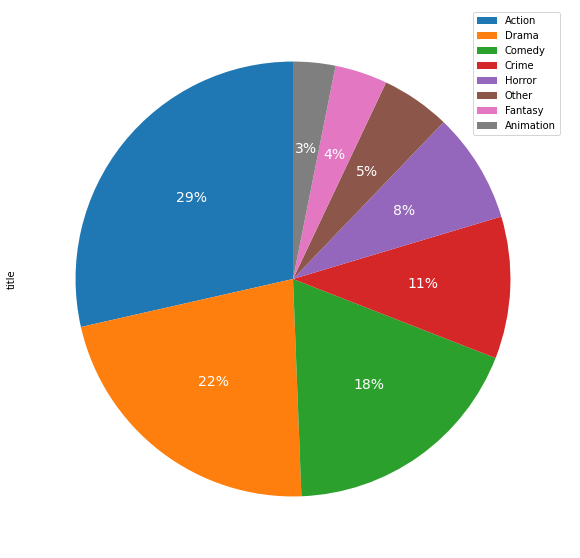

In [127]:
labels = list(chart.index)
chart.plot(kind='pie', y='spoiler', shadow=False, startangle=90, 
           figsize=(12,8), labels=labels, autopct='%.0f%%',
           textprops={'color':"w", 'fontsize':14})

In [153]:
test_df['wc_spoiler'] = test_df['spoiler'].str.split().str.len()

In [155]:
test = test_df.groupby('primary_genre').agg({'wc_spoiler': ['mean', 'min', 'max']})

Interested to see the word count of the spoilers by genres - so I pulled minimum, maximum and mean

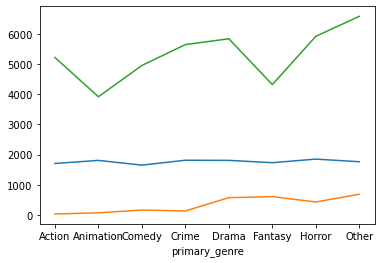

In [176]:
test.plot(legend=False)

#now create four blobs of test - by primary_genre:
#Action
#Drama
#Comedy
#Crime
#Horror
#that means I skip out on 12% of the plots - have abt 900 plots

#store in text files: action_spoilers.txt, drama_spoilers.txt etc.

In [180]:
test = test_df.groupby(['primary_genre'])['spoiler'].apply(lambda x: ''.join(x))

In [183]:
test.shape

(8,)

In [190]:
test

primary_genre
Action       The film opens with a man named David Cuevas (...
Animation    The film opens on a dragon trapper ship. Hiccu...
Comedy       Jack Foster (Micheal Richardson) is the manage...
Crime        The film starts with Kevin Wendell Crumb (Jame...
Drama        In 1997, young JD Vance (Owen Aztalos) lives i...
Fantasy      1983 – Up in the Orbita-4 spaceship, cosmonaut...
Horror       The film opens in Ohio where a young woman nam...
Other        A narrator tells how Nikola Tesla, as a small ...
Name: spoiler, dtype: object

In [195]:
type(test[0])

str

In [214]:
#example of how to write text blob to test file for genre
file = open('horror.txt', "w")

In [215]:
n = file.write(test[6])

In [216]:
file.close()

In [ ]:
##creating new notebook for text insights